# Filters

## Causal Signal Processing

\subsection{Motivation}

Here are some randomly chosen reasons why we need causal
signal processing:
\begin{itemize}
\item Fourier transform is \textsl{not real time}.  
We need the whole signal from the first to the last sample.
\item Reaction time: in time critical systems (robotics) we
want to react as fast as possible and with as little delay as possible!
\item We would like to **recycle** our analogue math.
\end{itemize}

![A causal system only \textsl{reacts} to it's input. Causal signals only evolve in positive time. Per definition the
signal is zero for $t<0$.](causality.png)

**Figure 1 : A causal system only reacts to it's input. Causal signals only evolve in positive time. Per definition the signal is zero for $t<0$.**


\subsection{Causality}

Fig. 1 illustrates the concept of causality. Causal systems cannot look into the future. They can only react to a certain input. Causal signals are kept zero for $t<0$ per definition.

\subsection{Convolution of Causal Signal}

After having defined causality we can define the convolution:
\begin{eqnarray} 
  y(t) & = & h(t) * x(t) = \int_{-\infty}^{\infty} h(t - \tau) x(\tau) d\tau \\
  y(n) & = & h(n) * x(n) = \sum_{n = -\infty}^\infty h(n) x(m - n)
\label{eqconv}
\end{eqnarray}

![Illustration of the convolution. The shaded area shows the integration for $t=1$.](convolution.png)

<center> <b>Figure 2 : Illustration of the convolution. The shaded area shows the integration for $t=1$.</b> </center> 

Note the reversal of integration of the function $h$. This is characteristic of the convolution. At time $t=0$
only the values at $h(0)$ and $x(0)$ are evaluated  (see Fig. 2). Note that both functions are zero for $t<0$ (causality!). At $t>0$ the surface which is integrated grows as shown in Fig. 2 for $t=1$.

What happens if $x(t)=\delta(t)$? Then Eq.~\ref{eqconv}:
\begin{equation} 
y(t) = \int_{-\infty}^{\infty} h(t - \tau) \delta(\tau) d\tau = h(t)
\label{convdelta}
\end{equation}
provides us with the function $h(t)$ itself. This will
be used later to determine the impulse response of the
filter.


\subsection{Laplace transform}
The Fourier transform is not suitable for causal systems
because it requires the whole signal from $-\infty < t < +\infty$.
What we need is a transform which works with causal signals.
This is the Laplace transform:
\begin{equation} 
\mathscr{L}{h(t)} = H(s) = \int_{0}^{\infty} h(t) e^{-st} dt
\label{lapltrans}
\end{equation}

The Laplace transform has a couple of very useful properties:

\begin{itemize}
\item Integration: 
\begin{equation}
\int f(\tau) d\tau \Leftrightarrow \frac{1}{s} F(s)
\end{equation}
\item Differentiation:
\begin{equation}
\frac{d}{dt} f(t) \Leftrightarrow s F(s) 
\end{equation}
\item Shift:
\begin{equation}
f(t - T) \Leftrightarrow e^{-Ts} F(s)
\label{shiftOperation}
\end{equation}

Proof:
\begin{eqnarray}
\mathscr{L}{h(t - T)} & = &\int_{0}^{\infty} h\underbrace{(t - T)}_{causal} e^{-st} dt \\
& = & \int_{0}^{\infty} h(t) e^{-s(t + T)} dt \\
& = & \int_{0}^{\infty} h(t) e^{-st} e^{-sT} dt \\
& = & e^{-sT} \underbrace{\int_{0}^{\infty} h(t) e^{-st} dt}_{H(s)} \\
& = & e^{-sT} H(s)
\end{eqnarray}

\item Convolution:
\begin{equation} 
f(t) * g(t) \Leftrightarrow F(s) G(s)
\end{equation}
\end{itemize}

![General idea of a filter and how to describe it: either with its impulse response or with it's Laplace transforms.](laplas.png)

<center> <b>Figure 3 : General idea of a filter and how to describe it: either with its impulse response or with it's Laplace transforms.</b> </center> 


\subsection{Filters}
Fig. 3 presents a causal filter as a black box. We send in a signal and and we get a signal out of it. The operation of the filter is that of a convolution of the input signal or a multiplication in the Laplace space:

\begin{equation} 
g(t) = h(t) * x(t) \Leftrightarrow Y(s) = H(s) \cdot X(s)
\end{equation}

### How to characterise filters?

1. **Impulse Response**
\begin{eqnarray}
x(t) & = & \delta(t) \qquad \leftarrow \mbox{delta pulse} \\
h(t) & = & y(t) \qquad \leftarrow \mbox{impulse response} \\
\end{eqnarray}
The filter is fully characterised by its impulse response $h(t)$.\\

2. **Transfer function**
The Laplace transform of the impulse response is called *Transfer Function*. With the argument $j\omega$ we
get the frequency response of the filter. What does the frequency response tell us about
the filter?  The absolute value of the
\begin{equation}
|H(i \omega)|
\end{equation}
gives us the amplitude or magnitude for every frequency
(compare the Fourier transform).
The angle of the term $H(j\omega)$ gives us the phase shift:
\begin{equation}
\phi = \arg\left(H(i \omega) \right)
\end{equation}
of the filter. In this context the \textsl{group delay} can
be defined as:
\begin{equation}
\tau_{\omega} = \frac{d \phi (\omega)}{d\omega}
\end{equation}
which is delay for a certain frequency $\omega$. In many applications
this should be kept constant for all frequencies.


\subsection{The z-transform}

The Laplace transform is for continuous causal signals but in DSP
we have sampled signals. So, we need to investigate what happens
if we feed a sampled signal:
\begin{equation}
x(t) = \sum_{n = 0}^{\infty} x(n) \delta(t - nT) \qquad \qquad \qquad  \mbox{Sampled signal} 
\end{equation} 
into the Laplace transform:
\begin{eqnarray}
X(s) & = & \sum_{n = 0}^{\infty} x(n) e^{-snT} \\
     & = & \int_{0}^{\infty} x(n) e^{-st} dt \\
     & = & \sum_{n = 0}^{\infty} x(n) \underbrace{(e^{-sT})^{n}}_{z^{-1} = e^{-sT}} \\
     & = & \sum_{n = 0}^{\infty} x(n) (z^{-1})^{n} \qquad \mbox{z-transform}
\end{eqnarray}
What is $e^{-sT} = z^{-1}$? It's a unit delay (see Eq.~\ref{shiftOperation}).

![Comparing the calculation of the frequency response in the continuous case and sampled case.](compare.png)

<center> <b>Figure 4 : Comparing the calculation of the frequency response
in the continuous case and sampled case.</b> </center> 

\subsection{Frequency response of a sampled filter}

Reminder: for analogue Signals we had $H(s)$ with $s=j \omega$.
Let's substitute $s$ by $z$: $z^{-1} = e^{-sT}$ which
gives us in general a mapping between the continuous domain and
the sampled domain:
\begin{equation}
z = e^{sT}
\label{mappingsz}
\end{equation}
With $s=j \omega$ this gives us $z = e^{j \omega}$ and therefore
the frequency response of the digital filter is:
\begin{equation}
H(e^{j \omega})
\end{equation}
which then leads to the amplitude and phase response:
\begin{itemize}
\item Amplitude/Magnitude: 
\begin{equation}
|H(e^{i \omega})|
\end{equation}
\item Phase
\begin{equation}
\arg H(e^{i \omega})
\end{equation}
\end{itemize}
Fig. 4 shows the difference between continuous and sampled signal. While in the continuous case the frequency response
is evaluated along the imaginary axis, in the sampled case it happens along the unit circle which makes the response
periodic! This is a subtle implication of the sampling theorem.

![FIR Filter.](FIR.png)

<center> <b>Figure 5 : FIR Filter.</b> </center> 

\subsection{FIR Filter}

What happens if we sample the impulse response $h(t)$ of an analogue filter? Let's find out:
\begin{equation}
\label{sampltime}
h(t)=\sum_{n=0}^\infty h(nT) \delta(t-nT)
\end{equation}
If we transform it to the Laplace space it looks like this:
\begin{equation}
\label{sFunktion}
H(s)=\sum_{n=0}^\infty h(nT) {\underbrace{{\left(e^{-sT}\right)}}_
                                           {z^{-1}}}^n
\end{equation}
Remember that $e^{-sT}$ has a very handy meaning: it is a delay
by the unit time step. Thus $z^{-n}$ is a delay by $n$ time steps.
We can rewrite Eq.~\ref{sFunktion}:
\begin{equation}
H(z)=\sum_{n=0}^\infty h(nT) {(z^{-1})}^n \label{ztrans}
\end{equation}
This is the z-transform of the impulse response $h(t)$ of the filter.

We filter now the signal $X(z)$ with $H(z)$:
\begin{equation}
H(z)X(z)=\underbrace{\sum_{n=0}^\infty h(nT) z^{-n}}_{H(z)} X(z) \label{notFIRyet}
\end{equation}

This sum is a direct recipe how to filter the signal $X(z)$. We only need the impulse response of the filter $h(nT)$ and we can
set up a digital filter (see Fig. 5). Of course in practise this impulse response cannot run till infinity
but only for a limited number of samples. These are often called `taps`. So for example a filter with $100$ samples of $h(nT)$ has $100$ `taps`. This in turn then requires a delay line which can hold $N=100$ samples:

\begin{equation}
\label{FIRz}
H(z)X(z)= \underbrace{\sum_{n=0}^N h(nT) z^{-n}}_{H(z)} X(z) 
\end{equation}

This is the formula of an Finite Impulse Response filter where we have sampled an analogue impulse response $h(t)$ at time intervals of $T$. However, often the impulse response of the filter is derived directly in the digital domain where the argument of $h(n)$ represent just sample indices $n$ and the sampling interval is implicitly the inverse of the sampling
rate. For that reason one needs to distinguish between:

\begin{eqnarray}
H(z)X(z) & = & \sum_{n=0}^N h_{analogue}(nT) z^{-n} \, X(z) \label{FIRa} \\
H(z)X(z) & = & \sum_{n=0}^N h_{digital}(n) z^{-n} \, X(z) \label{FIRd}
\end{eqnarray}

This is usually clear from the context which impulse response is meant.

\subsection{Generally FIR filters do not perform a convolution operation}

Remember that we have derived the FIR filters from the analogue domain by filtering a signal (Eq.\ref{notFIRyet}). The timedomain representation of this is a discrete and causal convolution operation (using the sampled Laplace transform). However, the problem is that this runs to **infinite time** and would require an infinite number of delay steps and thus infinite time to complete. So the FIR filter at best performs an approximation of the convolution operation but there
are serious problems with the finite number of taps ($N$) which requires a technique called windowing which moves it even further away from a convolution operation. On the other hand if the impulse response is strictly limited in time one can use this property for example for matched filters. However, the bottomline is that sweeping statements such as that `FIR filters perform a convolution` are **generally wrong** if nothing is known of the impulse response.

\subsection{Window functions}
So far we still have a infinite number of coefficients for for the FIR filter because there's no guarantee that the  impulse response becomes zero after $M/2$ delays. Thus, we have to find a way to truncate the response without distorting the filter response.

![Windowing](windowing.png)

<center> <b>Figure 6 : Different window functions applied to a low pass filter with cutoff at $f=0.1$ and 100 taps.</b> </center>

The standard technique is to multiply the coefficients with a window
function which becomes and stays zero at a certain coefficient
$n>N$ so that Eq.~\ref{FIRz} need not to run to infinity:
\begin{equation}
\label{FIRzlimit}
H(z)X(z)=\sum_{n=0}^N \underbrace{h(nT) w(nT)} z^{-n} X(z)
\end{equation}

\begin{enumerate}
\item Rectangular window: truncating the impulse response.
Problem: we get ripples in the frequency-response.
The stop-band damping is poor

\item Triangular or Bartlett window: greatly improved stop-band attenuation.
\item Hanning and Hamming window: standard windows in many applications.
\begin{equation}
w(n) = \alpha - (1-\alpha) \cos\left(\frac{2\pi n}{M}\right)
\end{equation}
\begin{itemize}
\item Hamming: $\alpha = 0.54$
\item Hanning: $\alpha = 0.5$
\end{itemize}

\item Blackman window:
\begin{equation}
w(n) = 0.42 + 0.5 \cos \left(\frac{2 \pi n}{M}\right) + 
0.08 \cos \left( \frac{4 \pi n}{M} \right) 
\end{equation}
\item Kaiser window: control over stop- and passband. No closed form
equation available.
\end{enumerate}
To illustrate how window functions influence the frequency response
we have taken an impulse response of a lowpass filter ($f_c=0.1$)
and applied different window functions to it (Fig. 6).

Note that the higher the damping the wider the transition from pass-
to stopband. This can be seen when comparing the Blackman window with
the Hamming window (Fig. 6). For the lowpass
filter this seems to be quite similar. However, for a bandstop filter
the wider transition width might lead actually to very poor stopband
damping. In such a case a Hamming window might be a better choice.

In [ ]:
# Author : Jay Patel

import random
from numpy import cos, sin, pi, absolute, arange, linspace
from scipy.signal import kaiserord, lfilter, firwin, freqz, kaiser_beta
from matplotlib.pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show, rcParams, scatter
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

sample_rate = 18000.0
nsamples = 100
#t = arange(nsamples) / sample_rate
#x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + 0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + 0.1*sin(2*pi*23.45*t+.8)
t = linspace(-5.*pi,5.*pi,300);
# x = sin(10*t)+sin(4*t)+cos(7*t)+sin(t);
# x= sin(10*linspace(-5.*pi,5.*pi,300))
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + 0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + 0.1*sin(2*pi*23.45*t+.8)

nyq_rate = sample_rate / 2.0
width = 360000.0/nyq_rate
beta = kaiser_beta(40)
passband= [0.44, 0.66]
N= 11
taps = firwin(N, passband, window=('kaiser', beta), pass_zero=False)
filtered_x = lfilter(taps, 1.0, x)

In [3]:
N

11

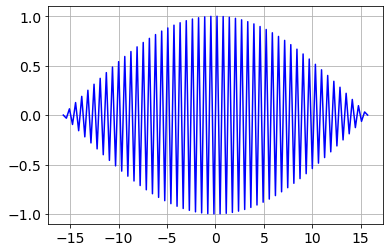

In [7]:
# scatter(linspace(-5.*pi,5.*pi,100),sin(10*linspace(-5.*pi,5.*pi,100)))
plot(linspace(-5.*pi,5.*pi,100),sin(10*linspace(-5.*pi,5.*pi,100)),'b', lw=1.5);grid()
show()

In [8]:
from scipy.signal import kaiser_beta
kaiser_beta(40)

3.3953210522614574

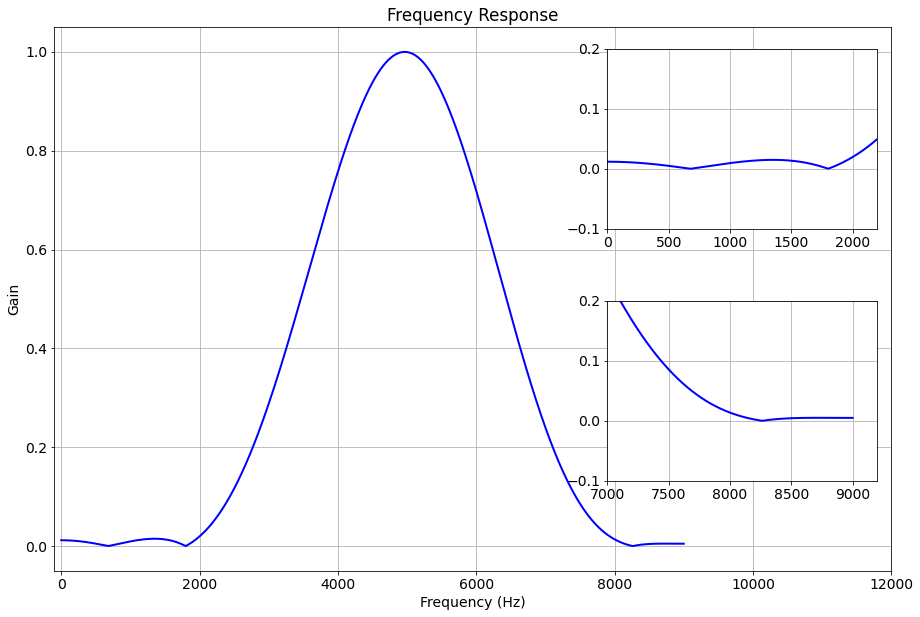

In [10]:
from numpy import array
rcParams['figure.figsize']= 15, 10
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h),'b', linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
# ylim(-0.05, 1.05)
xlim(-100,12000)
grid(True)

ax1 = axes([0.637, 0.6, .25, .25])
plot((w/pi)*nyq_rate, absolute(h),'b', linewidth=2)
xlim(0,2200)
ylim(-0.1,0.2)
grid(True)

ax2 = axes([0.637, 0.25, .25, .25])
plot((w/pi)*nyq_rate, absolute(h),'b', linewidth=2)
xlim(7000, 9200)
ylim(-0.1,0.2)
grid(True)
show()

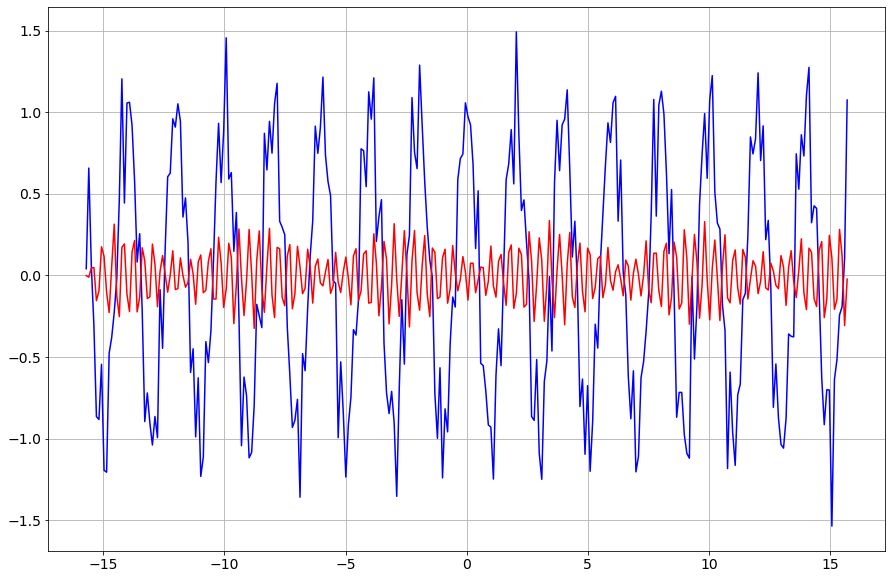

In [15]:
rcParams['figure.figsize']= 15, 10
plot(t,x,'b')
# scatter(t,x, color='orange')
plot(t,filtered_x, color='red')
# scatter(t, filtered_x, color='black')
grid()
show()

In [16]:
w

array([0.00000000e+00, 3.92699082e-04, 7.85398163e-04, ...,
       3.14041456e+00, 3.14080726e+00, 3.14119995e+00])

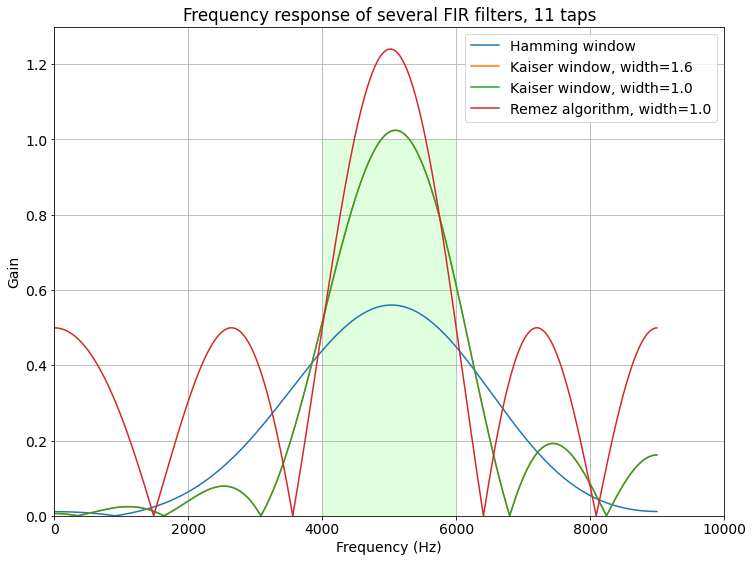

In [18]:
from scipy.signal import *

# Several flavors of bandpass FIR filters.

def bandpass_firwin(ntaps, lowcut, highcut, fs, window='hamming'):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=window, scale=False)
    return taps

def bandpass_kaiser(ntaps, lowcut, highcut, fs, width):
    nyq = 0.5 * fs
    atten = kaiser_atten(ntaps, width / nyq)
    beta = kaiser_beta(atten)
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=('kaiser', beta), scale=False)
    return taps

def bandpass_remez(ntaps, lowcut, highcut, fs, width):
    delta = 0.5 * width
    edges = [0, lowcut - delta, lowcut + delta,
             highcut - delta, highcut + delta, 0.5*fs]
    taps = remez(ntaps, edges, [0, 1, 0], Hz=fs)
    return taps


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    
    plt.rcParams.update({'font.size': 14})

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 18000.0
    lowcut = 4000.0
    highcut = 6000.0

    ntaps = 11
    taps_hamming = bandpass_firwin(ntaps, lowcut, highcut, fs=fs)
    taps_kaiser16 = bandpass_kaiser(ntaps, lowcut, highcut, fs=fs, width=1.6)
    taps_kaiser10 = bandpass_kaiser(ntaps, lowcut, highcut, fs=fs, width=1.0)
    remez_width = 1.0
    taps_remez = bandpass_remez(ntaps, lowcut, highcut, fs=fs, width=remez_width)

    # Plot the frequency responses of the filters.
    plt.figure(1, figsize=(12, 9))
    plt.clf()

    # First plot the desired ideal response as a green(ish) rectangle.
    rect = plt.Rectangle((lowcut, 0), highcut - lowcut, 1.0,
                         facecolor="#60ff60", alpha=0.2)
    plt.gca().add_patch(rect)

    # Plot the frequency response of each filter.
    w, h = freqz(taps_hamming, 1, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="Hamming window")

    w, h = freqz(taps_kaiser16, 1, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="Kaiser window, width=1.6")

    w, h = freqz(taps_kaiser10, 1, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="Kaiser window, width=1.0")

    w, h = freqz(taps_remez, 1, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h),
             label="Remez algorithm, width=%.1f" % remez_width)

    plt.xlim(0, 10000.0)
    plt.ylim(0, 1.3)
    plt.grid(True)
    plt.legend()
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.title('Frequency response of several FIR filters, %d taps' % ntaps)

    plt.show()

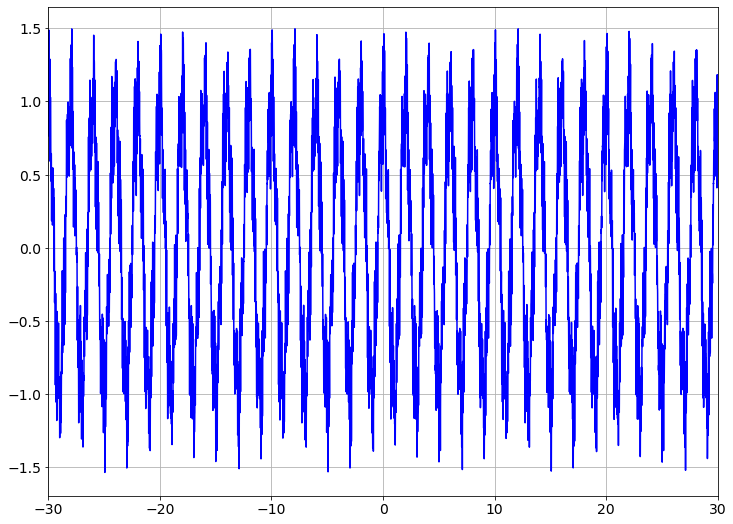

In [19]:
import random

sample_rate = 18000.0
nsamples = 100

t = np.linspace(-100.*np.pi,100.*np.pi, num=100000);
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + 0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + 0.1*np.sin(2*np.pi*23.45*t+.8)
# x= sin(t) + 100*random.choice(t);
plt.figure(1, figsize=(12, 9))
plt.plot(t,x,'b');plt.xlim(-30,30)
plt.grid()

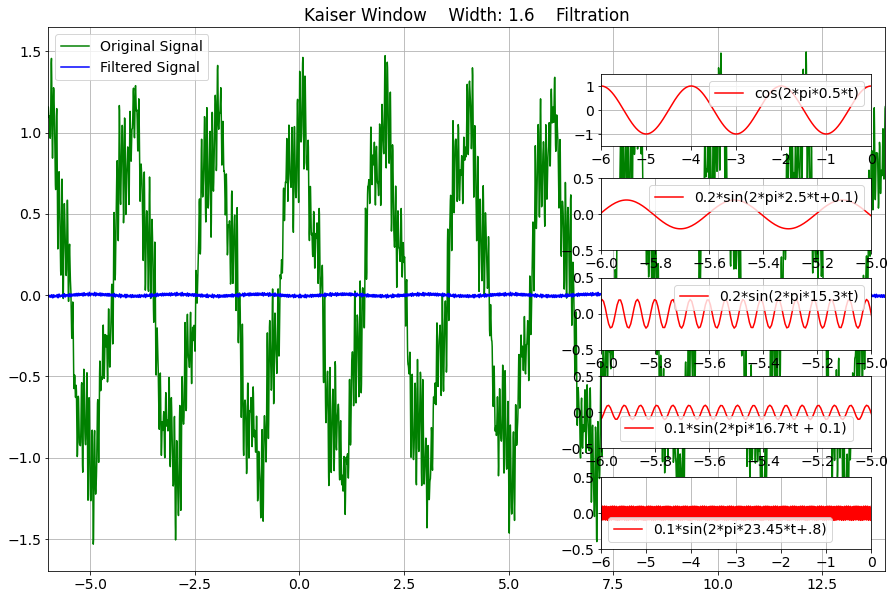

In [20]:
from matplotlib.pyplot import *
from numpy import *

ultimateKaiser16= lfilter(taps_kaiser16,1.0,x)
figure(2, figsize=(15, 10))
clf()
plot(t,x,'g', label="Original Signal")
plot(t,ultimateKaiser16,'b', label="Filtered Signal")
xlim(-6, 14)
legend()
title("Kaiser Window    Width: 1.6    Filtration")
grid()

ax1 = axes([0.637, 0.715, .25, .1])
plot(t,(cos(2*pi*0.5*t)),label="cos(2*pi*0.5*t)", color="red")
ylim(-1.5,1.5)
xlim(-6,0)
legend()
grid()

ax2 = axes([0.637, 0.57, .25, .1])
plot(t,(0.2*sin(2*pi*2.5*t+0.1)),label="0.2*sin(2*pi*2.5*t+0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax3 = axes([0.637, 0.432, .25, .1])
plot(t,(0.2*sin(2*pi*15.3*t)),label="0.2*sin(2*pi*15.3*t)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax4 = axes([0.637, 0.295, .25, .1])
plot(t,(0.1*sin(2*pi*16.7*t + 0.1)),label="0.1*sin(2*pi*16.7*t + 0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax5 = axes([0.637, 0.155, .25, .1])
plot(t,(0.1*sin(2*pi*23.45*t+.8)),label="0.1*sin(2*pi*23.45*t+.8)", color="red")
ylim(-0.5,0.5)
xlim(-6,0)
legend()

grid()
show()

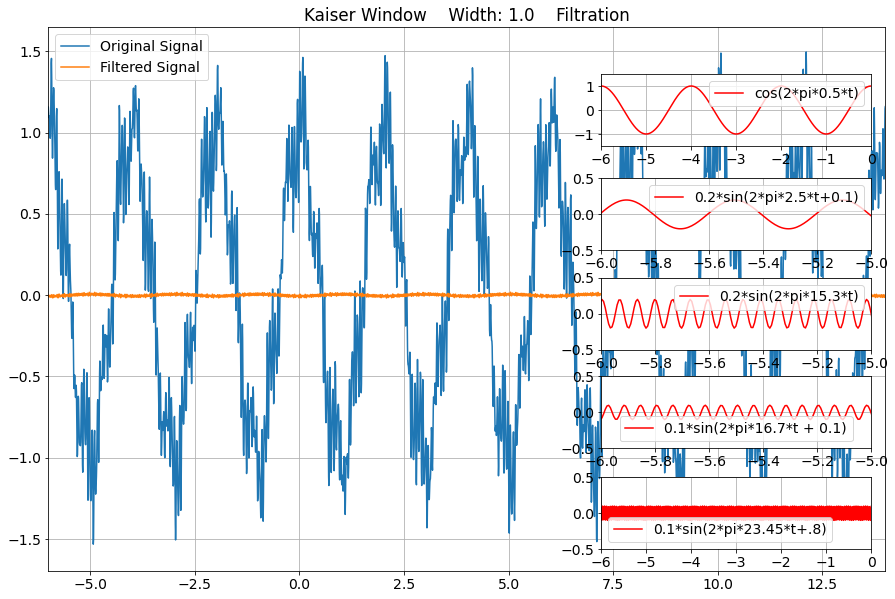

In [21]:
ultimateKaiser10= lfilter(taps_kaiser10,1.0,x)
figure(3, figsize=(15, 10))
clf()
plot(t,x,label="Original Signal")
plot(t,ultimateKaiser10,label="Filtered Signal")
xlim(-6, 14)
legend()
title("Kaiser Window    Width: 1.0    Filtration")
grid()

ax1 = axes([0.637, 0.715, .25, .1])
plot(t,(cos(2*pi*0.5*t)),label="cos(2*pi*0.5*t)", color="red")
ylim(-1.5,1.5)
xlim(-6,0)
legend()
grid()

ax2 = axes([0.637, 0.57, .25, .1])
plot(t,(0.2*sin(2*pi*2.5*t+0.1)),label="0.2*sin(2*pi*2.5*t+0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax3 = axes([0.637, 0.432, .25, .1])
plot(t,(0.2*sin(2*pi*15.3*t)),label="0.2*sin(2*pi*15.3*t)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax4 = axes([0.637, 0.295, .25, .1])
plot(t,(0.1*sin(2*pi*16.7*t + 0.1)),label="0.1*sin(2*pi*16.7*t + 0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax5 = axes([0.637, 0.155, .25, .1])
plot(t,(0.1*sin(2*pi*23.45*t+.8)),label="0.1*sin(2*pi*23.45*t+.8)", color="red")
ylim(-0.5,0.5)
xlim(-6,0)
legend()
grid()

show()

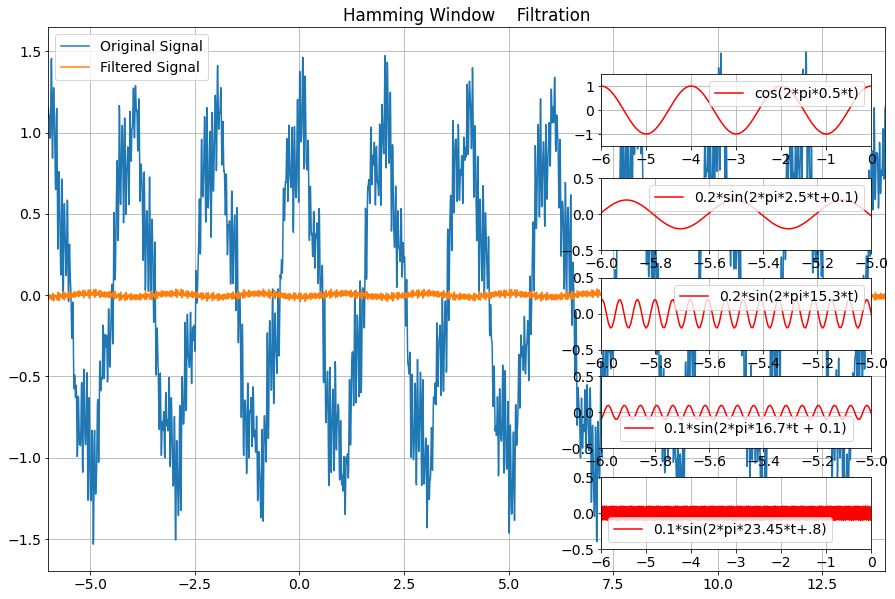

In [22]:
ultimateHamming= lfilter(taps_hamming,1.0,x)
figure(4, figsize=(15, 10))
clf()
plot(t,x,label="Original Signal")
plot(t,ultimateHamming,label="Filtered Signal")
xlim(-6, 14)
legend()
title("Hamming Window    Filtration")
grid()

ax1 = axes([0.637, 0.715, .25, .1])
plot(t,(cos(2*pi*0.5*t)),label="cos(2*pi*0.5*t)", color="red")
ylim(-1.5,1.5)
xlim(-6,0)
legend()
grid()

ax2 = axes([0.637, 0.57, .25, .1])
plot(t,(0.2*sin(2*pi*2.5*t+0.1)),label="0.2*sin(2*pi*2.5*t+0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax3 = axes([0.637, 0.432, .25, .1])
plot(t,(0.2*sin(2*pi*15.3*t)),label="0.2*sin(2*pi*15.3*t)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax4 = axes([0.637, 0.295, .25, .1])
plot(t,(0.1*sin(2*pi*16.7*t + 0.1)),label="0.1*sin(2*pi*16.7*t + 0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax5 = axes([0.637, 0.155, .25, .1])
plot(t,(0.1*sin(2*pi*23.45*t+.8)),label="0.1*sin(2*pi*23.45*t+.8)", color="red")
ylim(-0.5,0.5)
xlim(-6,0)
legend()
grid()

show()

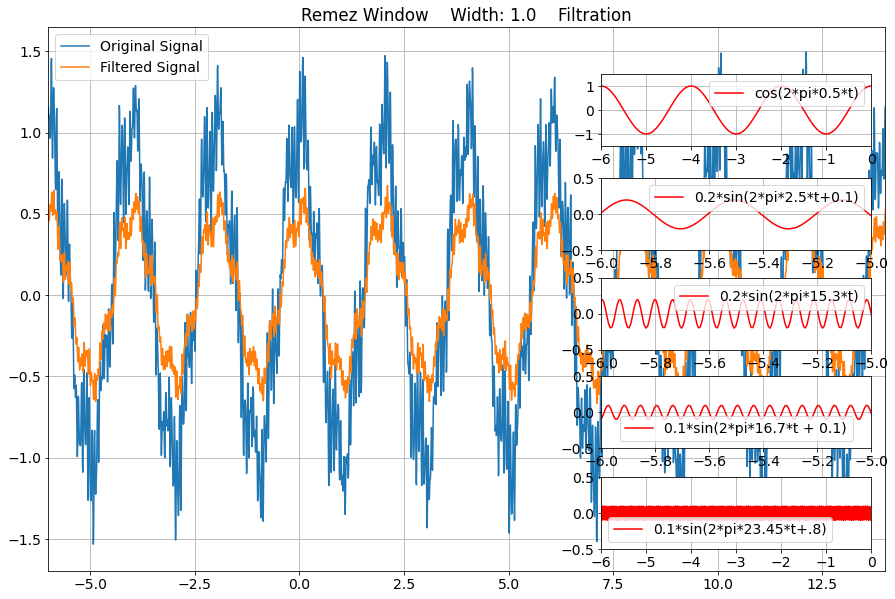

In [23]:
ultimateRemez= lfilter(taps_remez,1.0,x)
figure(5, figsize=(15, 10))
clf()
plot(t,x,label="Original Signal")
plot(t,ultimateRemez,label="Filtered Signal")
xlim(-6, 14)
legend()
title("Remez Window    Width: 1.0    Filtration")
grid()

ax1 = axes([0.637, 0.715, .25, .1])
plot(t,(cos(2*pi*0.5*t)),label="cos(2*pi*0.5*t)", color="red")
ylim(-1.5,1.5)
xlim(-6,0)
legend()
grid()

ax2 = axes([0.637, 0.57, .25, .1])
plot(t,(0.2*sin(2*pi*2.5*t+0.1)),label="0.2*sin(2*pi*2.5*t+0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax3 = axes([0.637, 0.432, .25, .1])
plot(t,(0.2*sin(2*pi*15.3*t)),label="0.2*sin(2*pi*15.3*t)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax4 = axes([0.637, 0.295, .25, .1])
plot(t,(0.1*sin(2*pi*16.7*t + 0.1)),label="0.1*sin(2*pi*16.7*t + 0.1)", color="red")
ylim(-0.5,0.5)
xlim(-6,-5)
legend()
grid()

ax5 = axes([0.637, 0.155, .25, .1])
plot(t,(0.1*sin(2*pi*23.45*t+.8)),label="0.1*sin(2*pi*23.45*t+.8)", color="red")
ylim(-0.5,0.5)
xlim(-6,0)
legend()
grid()

show()

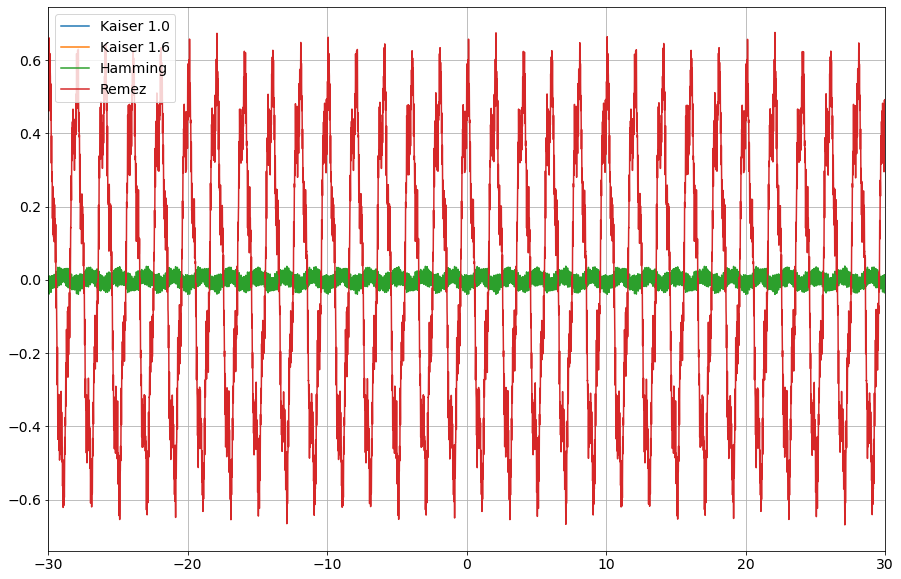

In [24]:
figure(5, figsize=(15, 10))
clf()
plot(t,lfilter(taps_kaiser10,1.0,x), label="Kaiser 1.0");grid()
plot(t,lfilter(taps_kaiser16,1.0,x), label="Kaiser 1.6");grid()
plot(t,lfilter(taps_hamming,1.0,x), label="Hamming");grid()
plot(t,lfilter(taps_remez,1.0,x), label="Remez");grid()
xlim(-30,30) # for better visibility
legend();grid()
show()